In [535]:
import os
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.io import fits
homedir = os.getenv("HOME")

#general Virgo v2 table
vf_full = Table.read(homedir+'/Desktop/galfit_files/VF_WISESIZE_photSNR.fits')
#general Virgo v2 env table
env_full = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')

In [525]:
#divide subsample into environments

vf = vf_full[vf_full['subsample_flag'] & ~vf_full['WISE_AGN_flag'] & ~vf_full['kauffman_AGN_flag']]
env = env_full[vf_full['subsample_flag'] & ~vf_full['WISE_AGN_flag'] & ~vf_full['kauffman_AGN_flag']]

vf_cluster = vf[env['cluster_member']]
vf_rg = vf[env['rich_group_memb']]   #only galaxies in rich groups --> not in filaments, etc.
vf_fil = vf[env['filament_member']]
vf_pg = vf[env['poor_group_memb']]
vf_field = vf[env['pure_field']]

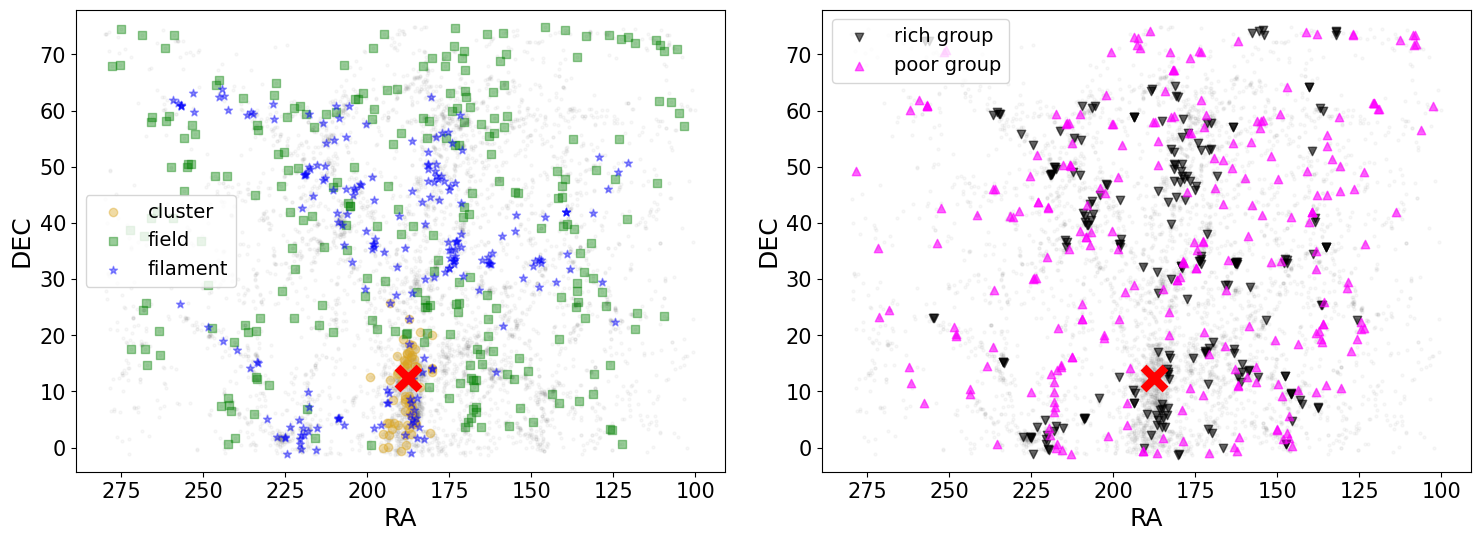

In [172]:
vf_env = [vf_cluster,vf_field,vf_fil]
vf_group = [vf_rg,vf_pg]
vf_label = ['cluster','field','filament']
group_label = ['rich group','poor group']
markers = ['o','s','*']
markers_group = ['v','^']
vf_color=['goldenrod','green','blue']
group_color=['black','magenta']

fig=plt.figure(figsize=(18,6))

plt.subplots_adjust(hspace=.2,wspace=.15)
        
for n in range(0,2):
    ax=fig.add_subplot(1,2,n+1)

    ax.scatter(vf_full['RA'],vf_full['DEC'],s=5,alpha=0.05,color='gray')
    #ax.scatter([187.7],[12.34],color='black',marker='x',s=100)
    
    plt.gca().invert_xaxis()
    plt.ylabel('DEC',fontsize=18)
    plt.xlabel('RA',fontsize=18)
    if n==0:
        for i in range(len(vf_env)):
            plt.scatter(vf_env[i]['RA'],vf_env[i]['DEC'],marker=markers[i],
                        label=vf_label[i],alpha=0.4,color=vf_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
    if n==1:
        for i in range(len(vf_group)):
            plt.scatter(vf_group[i]['RA'],vf_group[i]['DEC'],marker=markers_group[i],
                        label=group_label[i],alpha=0.6,color=group_color[i])
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
        
    ax.scatter([187.7],[12.34],color='red',marker='x',s=250, linewidths=6)
    plt.ylim(np.min(vf_full['DEC'])-3,np.max(vf_full['DEC'])+3)
    ax.legend(fontsize=14)

plt.savefig(homedir+'/Desktop/radec_env.png',dpi=150,bbox_inches='tight', pad_inches=0.2)
     
plt.show()

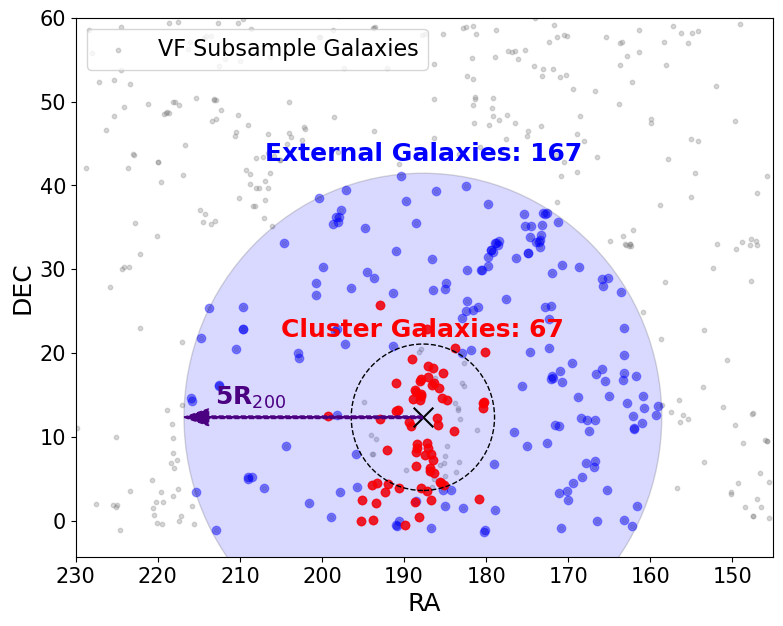

In [173]:
#nser = Table.read(homedir+'/output_params_r_psf.fits')['nsersic']

RA_center = 187.70
DEC_center = 12.34
virial_radius = 5.8224 #(degrees)

onept5_vir = 1.5*virial_radius
five_vir = 5*virial_radius

fig, ax = plt.subplots(figsize=(9,7))
dist = np.sqrt((vf['RA']-RA_center)**2 + (vf['DEC']-DEC_center)**2)
virial_1pt5flag = (dist<=onept5_vir)
#virial_5flag = ((dist>virial_radius)&(dist<=five_vir))
virial_5flag = (dist>onept5_vir)&(dist<=five_vir)

clus_flag = (env['cluster_member']) #| (virial_1pt5flag)
infall_flag = virial_5flag & (~env['cluster_member'])

plt.scatter(vf['RA'],vf['DEC'],alpha=0.3,s=10,color='gray',label='VF Subsample Galaxies')
#plt.scatter(vf['RA'][virial_1flag],vf['DEC'][virial_1flag],alpha=0.6,color='red')
plt.scatter(vf['RA'][infall_flag],vf['DEC'][infall_flag],alpha=0.4,color='blue')
plt.scatter(vf['RA'][clus_flag],vf['DEC'][clus_flag],alpha=0.6,color='red')

#circle_oneVR = plt.Circle((RA_center,DEC_center),virial_radius,facecolor='blue',edgecolor='black',alpha=0.15)
#ax.add_patch(circle_oneVR)
circle_fiveVR = plt.Circle((RA_center,DEC_center),virial_radius*5,facecolor='blue',edgecolor='black',alpha=0.15)
ax.add_patch(circle_fiveVR)

plt.scatter(vf['RA'][env['cluster_member']],vf['DEC'][env['cluster_member']],alpha=0.6,color='red')

#plt.title(r'Virgo cluster galaxies and those 1.5-5R$_{200}$',fontsize=20)

plt.ylim(np.min(vf_full['DEC'])-3,60)
plt.xlim(230,145)

plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)

ax.scatter([187.7],[12.34],color='black',marker='x',s=200)

circle_onept5VR = plt.Circle((RA_center,DEC_center),virial_radius*1.5,facecolor='none',edgecolor='black',linestyle='--')
ax.add_patch(circle_onept5VR)

plt.arrow(RA_center, DEC_center, five_vir, 0, color='indigo', linestyle="--", length_includes_head=True,
          head_width=2, head_length=3, width=0.3)
plt.text(213,13.8,r'5R$_{200}$',color='indigo',fontsize=18,weight='bold')

#plt.text(204,43,f'Infalling Galaxies: {len(vf[infall_flag & (nser<2)])}',color='blue',weight='bold',fontsize=18)
#plt.text(203,22,f'Cluster Galaxies: {len(vf[clus_flag & (nser<2)])}',color='red',weight='bold',fontsize=18)

plt.text(207,43,f'External Galaxies: {len(vf[infall_flag])}',color='blue',weight='bold',fontsize=18)
plt.text(205,22,f'Cluster Galaxies: {len(vf[clus_flag])}',color='red',weight='bold',fontsize=18)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)    

plt.legend(fontsize=16,loc='upper left')

plt.savefig(homedir+'/Desktop/VF_infallcore.png', bbox_inches='tight', pad_inches=0.2, dpi=100)

#len(vf[env['cluster_member']&(nser<2)])

plt.show()

------------

In [368]:
#data analysis

In [837]:
###### no more error text. >:/
import warnings
warnings.filterwarnings('ignore')

%run ~/github/research/data_analysis/re_analysis.py
cat = catalogs(conv=True,MeanMedian='median',MADmultiplier=5000,cutAGN=True,W1=True)

#cat.r12_vs_rstar(savefig=True)

#cat.env_means(mass_match=False,trimOutliers=False,errtype='bootstrap',r90=False,savefig=True)   #for MADmultiplier=5000 and trimOutliers=True, removes the pesky outlier galaxy
#cat.env_means_comp(savefig=False,trimOutliers=False,errtype='sterr')

#cat.mass_hist(z0mgs_comp=False,savefig=True)
#cat.envbins(savefig=False)

#cat.sfrmstar_magphys(show_HI=False,show_sizerat=True,show_D25=False,savefig=True)
#cat.sfrmstar_z0mgs(show_HI=False,show_sizerat=False,show_D25=True,savefig=True)
#cat.ratio_MS(savefig=True)

#cat.hist_dist_rats(savefig=True)
#cat.r12_vs_rstar_v2(savefig=True)

#cat.mass_hist_oneplot(savefig=True)
#cat.ndensity_hist_oneplot(fullsample=False,savefig=True)

#cat.wisesize_mass(nbins=3,savefig=False)

#cat.inclination_check(savefig=False)
#cat.mass_completeness_check(savefig=False)
#cat.mass_matching()
#cat.sfr_hist(z0mgs_comp=True)

#cat.envbins()

Convolution:  True
AGN cut from sample.
fraction AGN in VF subsample (before filtering out GALFIT errors): 0.152
This fracion is calculated from 151/995
Number of galaxies flagged with AGN *AND* a GALFIT error: 23

No GALFIT data for 19 w3 galaxies, 13 w1 galaxies, and 6 r galaxies.
Total number of galaxies with GALFIT errors or error flags: 149
Total number of galaxies with nser>6: 122

Total number of subsample galaxies remaining: 696

Environment Fractional Decomposition:
Cluster: 50/696 (7.18%)
RG: 180/696 (25.86%)
PG: 205/696 (29.45%)
Filament: 216/696 (31.03%)
Field: 194/696 (27.87%)



<Figure size 640x480 with 0 Axes>

USAGE:
    lcs = catalogs(MeanMedian='mean',cutAGN=False,W1=False) --> initiate catalog class. 
        MeanMedian will propagate to all plots; can either be 'mean' or 'median.' cutAGN
        will do precisely that, flagging both BPT AGN and AGN based on WISE magnitude colors.
        Conv=True is the default.
    lcs.wisesize_hist(savefig=False) --> generates vertically-oriented histogram subplots of 
        R12/Rr or R12/R3.4 distribution, separated into cluster vs. all else (external).
    lcs.LCS_hist(ReDisk='Re',savefig=False) --> generates same type of histogram plot as above but with 
        the actual LCS values. 'Re' or 'Disk' to instruct which column to use for size ratios.
    lcs.wisesize_mass(savefig=False) --> generates scatterplot of size ratio vs. mass bin using 
        LCS data, the format being similar to a skeleton version of Figure 13 from Finn+18. 
        Masses are from MAGPHYS SED fitting using photometry from John Moustakas. 
    lcs.wisesize_mass(nbins=3, 

<Figure size 640x480 with 0 Axes>

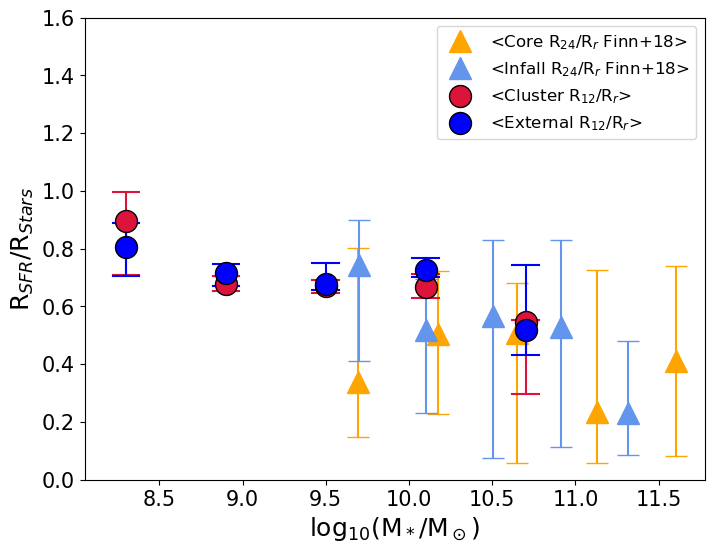

In [882]:
%run ~/github/research/data_analysis/LCS_comparison.py
lcs = catalogs(MeanMedian='median',cutAGN=True,W1=False)
#lcs.wisesize_hist(savefig=True)
lcs.wisesize_mass(nbins=5,savefig=False)

In [531]:
gradhot_fil = ascii.read(homedir+'/Desktop/Sim_pred_size/D20240523_GAEA_GRADSTRANG_noselection_file0_9_z=0.csv',
                        delimiter=',',format='csv')

In [372]:
magphys = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')
magphys_cut = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')[(magphys['magphysFlag']) & (vf_full['sgacut_flag'])]
magphys = magphys[(magphys['magphysFlag'])]

In [375]:
def colormass(x1,y1,x2,y2,name1,name2, figname='test',contourflag=False, \
             xmin=6, xmax=11.6, ymin=-3, ymax=2, contour_bins = 40, ncontour_levels=5,\
              xlabel=r'$\rm \log_{10}(M_\star/M_\odot) $', ylabel=r'$\rm \log_{10}(SFR/(M_{\odot}/yr)) $', 
              color1='black',color2='red',\
              nhistbin=50, alpha1=.4,alphagray=.01,marker2='o',\
              plot_top_histogram=True):

    if plot_top_histogram:
        fig = plt.figure(figsize=(8,8))
    else:
        fig = plt.figure(figsize=(8,5))
    
    
    plt.subplots_adjust(left=.15,bottom=.15)
    if plot_top_histogram:
        nrow = 4
        ncol = 4
    else:
        nrow = 3
        ncol = 4
    
    # for purposes of this plot, only keep data within the 
    # window specified by [xmin:xmax, ymin:ymax]
    
    keepflag1 = (x1 >= xmin) & (x1 <= xmax) & (y1 >= ymin) & (y1 <= ymax)
    keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
    
    x1 = x1[keepflag1]
    y1 = y1[keepflag1]
    
    x2 = x2[keepflag2]
    y2 = y2[keepflag2]
    n1 = sum(keepflag1)
    n2 = sum(keepflag2)
    
    if plot_top_histogram:
        ax1 = plt.subplot2grid((nrow,ncol),(1,0),rowspan=nrow-1,colspan=ncol-1, fig=fig)
    else:
        ax1 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=nrow,colspan=ncol-1, fig=fig)        

    label=name1
        
    plt.plot(x1,y1,'k.',alpha=alphagray,label=label, zorder=1,markersize=8)        
    
    label=name2
    plt.plot(x2,y2,'ro',alpha=alpha1, label=label,markersize=8,mec='k')
        
    plt.legend(loc='upper left',fontsize=13)

    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel,fontsize=26)
    plt.ylabel(ylabel,fontsize=26)
    plt.gca().tick_params(axis='both', labelsize=16)

    # add the top histogram
    if plot_top_histogram:
        ax2 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=1,colspan=ncol-1, fig=fig, sharex = ax1) #, yticks=[]
        print('just checking ...',len(x1),len(x2))
        print(min(x1))
        print(min(x2))
        minx = min([min(x1),min(x2)])
        maxx = max([max(x1),max(x2)])    
        mybins = np.linspace(minx,maxx,nhistbin)
        
        t = plt.hist(x1, density=False, bins=mybins,color=color1,histtype='step',lw=1.5, label=name1)
        t = plt.hist(x2, density=False, bins=mybins,color=color2,histtype='step',lw=1.5, label=name2)

        ax2.xaxis.tick_top()
        ax2.tick_params(axis='both', labelsize=16)


    # add the side histogram
    if plot_top_histogram:
        ax3 = plt.subplot2grid((nrow,ncol),(1,ncol-1),rowspan=nrow-1,colspan=1, fig=fig, sharey = ax1)
    else:
        ax3 = plt.subplot2grid((nrow,ncol),(0,ncol-1),rowspan=nrow,colspan=1, fig=fig, sharey = ax1)      
    miny = min([min(y1),min(y2)])
    maxy = max([max(y1),max(y2)])    
    mybins = np.linspace(miny,maxy,nhistbin)

    
    t=plt.hist(y1, density=False, orientation='horizontal',bins=mybins,color=color1,histtype='step',lw=1.5, label=name1)
    t=plt.hist(y2, density=False, orientation='horizontal',bins=mybins,color=color2,histtype='step',lw=1.5, label=name2)

    plt.yticks(rotation='horizontal')
    ax3.yaxis.tick_right()
    ax3.tick_params(axis='both', labelsize=16)

just checking ... 6139 551
5.701999474889637
6.244277120801843


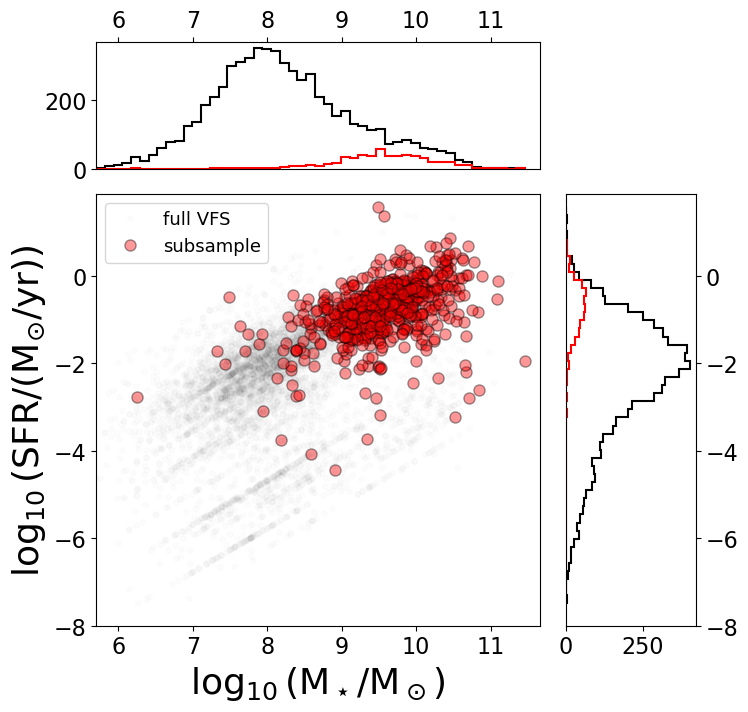

In [376]:
x1=magphys['logMstar']
y1=magphys['logSFR']
x2=magphys_cut['logMstar']
y2=magphys_cut['logSFR']
name1='full VFS'
name2='subsample'

colormass(x1,y1,x2,y2,name1,name2,
          xmin=5.7,xmax=np.max(x2)+0.2,ymin=-8,ymax=np.max(y2)+0.3,figname='test')

- ran 500 iterations of mass-matching, calculated size ratio medians for each environment bin (meaning I would have 500 medians for each bin, corresponding to the sizes of mass-matched galaxies after each iteration). I then evaluated the median of these medians and plotted this with standard deviation. I did likewise with the "means" of the medians with standard deviations, showing the spread of possible mean/medians values arising from mass-matching. 

- the cluster mean/median median is consistent, as to be expected. no error bars attached to the mean or median plot, given that there is no randomness associated with the choosing of the cluster galaxies (all other galaxies chosen randomly from a pool to match with the cluster galaxies).

- comparing the current median size ratio WRT environment plot to this median-of-medians figure, there is consistency (nearly not the case for the group galaxies). The mean is not as consistent.

# Scrap

In [302]:
from pygame import mixer

pygame 2.5.1 (SDL 2.28.2, Python 3.11.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [306]:
path = os.getenv("HOME")+'/github/GUI_odyssey/success.mp3'
mixer.init()
mixer.music.set_volume(0.2)
mixer.music.load(path)
mixer.music.play()

In [926]:
magphys=Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_legacyExt_final.fits')

In [586]:
w1_new = Table.read(homedir+'/Desktop/galfit_files/galfit_W1_03112024.fits')
w3_new = Table.read(homedir+'/Desktop/galfit_files/galfit_W3_03112024.fits')

In [925]:
phot = Table.read(homedir+'/Desktop/v2-20220820/virgofilaments-v3b-legacyphot.fits')

### updating VF_WISESIZE.fits --> problematic VFID cases

In [529]:
#fascinating scenario --> group galaxy is not a primary galaxy, but its primary galaxy is not in subsample!
#VFID4046, VFID6115
#can still use their values, but cannot display on website. I think the time the edits need 
#is not worth the potential output.

#REMEMBER TO ADD BACK TO THE SUBSAMPLE EACH TIME THEY ARE REMOVED!

In [827]:
add=True

index_flag = vf['VFID']=='VFID0025'
vf['subsample_flag'][index_flag]=add

index_flag = vf['VFID']=='VFID4853'
vf['subsample_flag'][index_flag]=add

#index_flag = vf['VFID']=='VFID6115'
#vf['subsample_flag'][index_flag]=add

In [828]:
vf.write(homedir+'/Desktop/galfit_files/VF_WISESIZE_photSNR.fits',overwrite=True)
vf.write(homedir+'/vf_html_w1_v2/all_input_fits/VF_WISESIZE_photSNR.fits',overwrite=True)

In [100]:
print(f'ngal field n>6: {len(w3[nser_flag & subsample_flag & field_flag])/len(w3[subsample_flag & field_flag])}')
print(f'ngal filament n>6: {len(w3[nser_flag & subsample_flag & fil_flag])/len(w3[subsample_flag & fil_flag])}')
print(f'ngal poor group n>6: {len(w3[nser_flag & subsample_flag & pg_flag])/len(w3[subsample_flag & pg_flag])}')
print(f'ngal rich group n>6: {len(w3[nser_flag & subsample_flag & rg_flag])/len(w3[subsample_flag & rg_flag])}')
print(f'ngal cluster n>6: {len(w3[nser_flag & subsample_flag & cluster_flag])/len(w3[subsample_flag & cluster_flag])}')

ngal field n>6: 0.1174496644295302
ngal filament n>6: 0.13114754098360656
ngal poor group n>6: 0.11619718309859155
ngal rich group n>6: 0.12
ngal cluster n>6: 0.17073170731707318


#### Creating new catalog using Zakharova+24's DisPerSE's filament IDs

In [536]:
vf = Table.read(homedir+'/Desktop/galfit_files/VF_WISESIZE_photSNR.fits')
dis = Table.read(homedir+'/Desktop/galfit_files/vf_v2_filaments_members_tom+disperse.csv')

In [331]:
for n in vf['VFID']:
    if n not in dis['VFID']:
        dis.add_row([n,0,0,'False','False',0])
sorted_indices = ind = np.argsort(dis['VFID']) 
dis = dis[sorted_indices]

In [361]:
Filament_Memb_Disperse=np.zeros(len(dis['Filament_Memb_Disperse']),dtype=bool)
for i in range(len(dis['Filament_Memb_Disperse'])):
    if dis['Filament_Memb_Disperse'][i]=='True':
        Filament_Memb_Disperse[i]=True
    if dis['Filament_Memb_Disperse'][i]=='False':
        Filament_Memb_Disperse[i]=False

In [367]:
#dis.remove_column('Filament_Memb_Gianluca')
#dis.remove_column('Filament_Memb_Disperse')
dis.add_column(Filament_Memb_Disperse,name='Filament_Memb_Disperse')

In [368]:
dis.write(homedir+'/Desktop/vf_disperse_filaments.fits',overwrite=True)

In [457]:
from astropy.io import ascii
t=ascii.read(homedir+'/Desktop/Sim_pred_size/gaea_all_virgo_iv_withsize.csv',delimiter=',')
#t[t['stellarMass']>1]

In [449]:
field = np.zeros(len(t),dtype='bool')
fil = np.zeros(len(t),dtype='bool')
clus = np.zeros(len(t),dtype='bool')

for i in range(len(t)):
    if t['Cluster'][i]=='True':
        clus[i]=True
    else:
        clus[i]=False
    
    if t['Filament_Memb'][i]=='True':
        fil[i]=True
    else:
        fil[i]=False
        
    if t['Pure_Field'][i]=='True':
        field[i]=True
    else:
        field[i]=False

In [453]:
t['Cluster'] = clus
t['Filament_Memb'] = fil
t['Pure_Field'] = field

In [456]:
t.write(homedir+'/Desktop/Sim_pred_size/gaea_all_virgo_iv_withsize.csv',delimiter=',',overwrite=True)

#### AGN

In [771]:
vf_agn = vf[(vf['WISE_AGN_flag']) | (vf['kauffman_AGN_flag'])]
kauffman_agn = (vf['kauffman_AGN_flag'])
group_vfids = ['VFID5859','VFID5892','VFID5855','VFID5842','VFID5889','VFID5851','VFID5844','VFID5879']
for i in range(len(vf_agn)):
    if vf_agn[i]['VFID'] in group_vfids:
        print(vf_agn[i]['VFID'])
        print(vf_agn[i]['WISE_AGN_flag'])
        print(vf_agn[i]['kauffman_AGN_flag'])

VFID5842
False
True
VFID5844
False
True


In [733]:
#WISE color magnitudes
#wise_mag_cut=Table.read(homedir+'/Desktop/v2-20220820/vf_v2_unwise.fits')[subsample_flag]

#spectral line strengths
bpt_lines_cut=Table.read(homedir+'/Desktop/v2-20220820/vf_v2_nsa_v0.fits')

#wise_agn = (wise_mag_cut['w1_mag'] - wise_mag_cut['w2_mag']>0.65) & (wise_mag_cut['w2_mag']-wise_mag_cut['w3_mag']<4.0)
agn_kauffman = (np.log10(bpt_lines_cut['O3FLUX']/bpt_lines_cut['HBFLUX']) > (.61/(np.log10(bpt_lines_cut['N2FLUX']/bpt_lines_cut['HAFLUX']-.05))+1.3)) | (np.log10(bpt_lines_cut['N2FLUX']/bpt_lines_cut['HAFLUX']) > 0.)

o3hb_rat = np.log10(bpt_lines_cut['O3FLUX']/bpt_lines_cut['HBFLUX'])
n2ha_rat = np.log10(bpt_lines_cut['N2FLUX']/bpt_lines_cut['HAFLUX'])

In [734]:
def kauffman_func(x):
    return 1.3+(0.61/(x-0.05))

In [755]:
x=np.arange(-4,-0.04,0.01)
y=kauffman_func(x)

In [795]:
group_vfids = np.sort(['VFID5859','VFID5892','VFID5855','VFID5842','VFID5889','VFID5851','VFID5844','VFID5879'])
group_flag = [VFID in vfids for VFID in vf['VFID']]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


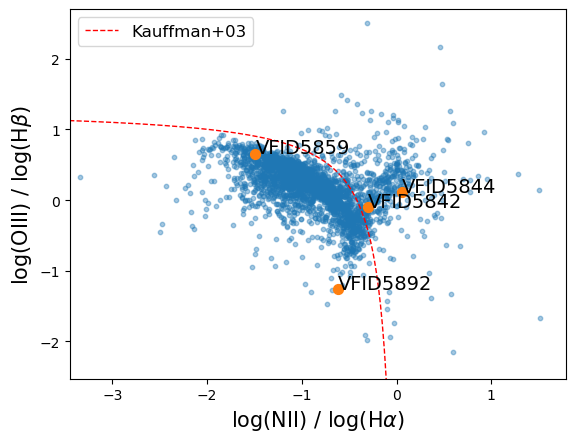

In [824]:
plt.plot(x,y,lw=1,ls='--',color='red',label='Kauffman+03')
plt.scatter(n2ha_rat,o3hb_rat,s=10,alpha=0.4)

plt.scatter(n2ha_rat[group_flag],o3hb_rat[group_flag],s=50)

plt.xlim(-3.45,)
plt.ylim(np.nanmin(o3hb_rat)-0.2,np.nanmax(o3hb_rat)+0.2)
plt.xlabel(r'log(NII) / log(H$\alpha$)',fontsize=15)
plt.ylabel(r'log(OIII) / log(H$\beta$)',fontsize=15)

for n in range(len(n2ha_rat[group_flag])):
    plt.text(n2ha_rat[group_flag][n],o3hb_rat[group_flag][n],group_vfids[n],color='black',fontsize=14)

plt.legend(fontsize=12,loc='upper left')    
plt.show()

In [820]:
linedat = Table([bpt_lines_cut['VFID'],bpt_lines_cut['HAFLUX'],bpt_lines_cut['HAFLUXERR'],
               bpt_lines_cut['HBFLUX'],bpt_lines_cut['HBFLUXERR'],bpt_lines_cut['N2FLUX'],
               bpt_lines_cut['N2FLUXERR'],bpt_lines_cut['O3FLUX'],bpt_lines_cut['O3FLUXERR']],
              names=['VFID','HAFLUX','HAFLUXERR','HBFLUX','HBFLUXERR','N2FLUX',
                     'N2FLUXERR','O3FLUX','O3FLUXERR'])

In [819]:
newtab[newtab['VFID']=='VFID5842']

VFID,HAFLUX,HAFLUXERR,HBFLUX,HBFLUXERR,N2FLUX,N2FLUXERR,O3FLUX,O3FLUXERR
bytes8,float32,float32,float32,float32,float32,float32,float32,float32
VFID5842,139.12395,6.1575975,27.898981,8.842175,69.657295,5.7680535,22.06835,6.9496403


In [825]:
group_vfids

array(['VFID5842', 'VFID5844', 'VFID5851', 'VFID5855', 'VFID5859',
       'VFID5879', 'VFID5889', 'VFID5892'], dtype='<U8')

#### LCS Paper

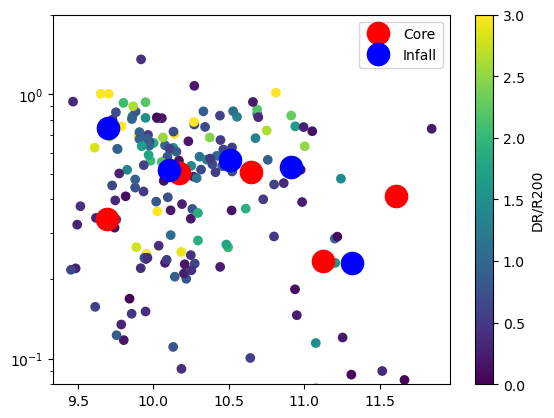

In [834]:
import scipy
test = Table.read(os.getenv("HOME")+'/Desktop/LCS_paper1_final_sample.fits')
plt.figure()
yvar = 'sizeratio_re'
#yvar = 'sizeratio_disk'
plt.scatter(test['logMstar'],test[yvar],c=test['DR_R200'],vmin=0,vmax=3)
cb = plt.colorbar(label='DR/R200')
flags = [test['core'],~test['core']]#,(~test['core'] | ~test['infall'])]
labels = ['Core','Infall']
colors = ['r','b','g']
for i,f in enumerate(flags):
    x = test['logMstar'][f]
    y = test[yvar][f]
    
    bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(x,y,statistic='median', bins=5)
    bin_centers = .5*(bin_edges[:-1]+bin_edges[1:])
    plt.plot(bin_centers,bin_means,'ko',markersize=16,color=colors[i],label=labels[i])
plt.yscale('log')
plt.ylim(.08,2)
plt.legend()

In [888]:
w3=Table.read(homedir+'/Desktop/vf_v2_galfit_W3.fits')
w4=Table.read(homedir+'/Desktop/vf_v2_galfit_W4.fits')
flags = ~(w4['CNumerical_Error']) & ~(w3['CNumerical_Error'])

Text(0, 0.5, 'R$_{W3}$/R$_{W4}$')

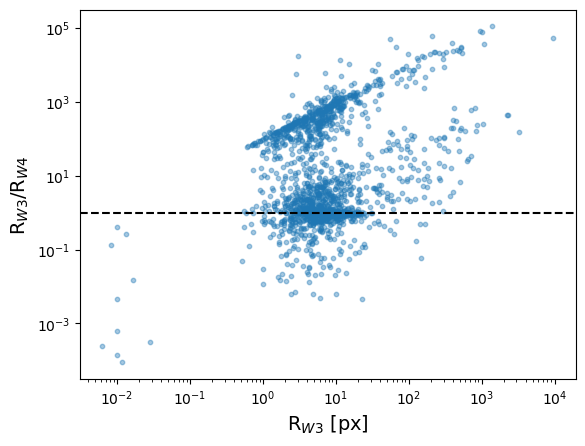

In [899]:
plt.scatter(w3[flags]['CRE'],w3[flags]['CRE']/w4[flags]['CRE'],s=10,alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.axhline(1,color='black',ls='--')
plt.xlabel(r'R$_{W3}$ [px]',fontsize=14)
plt.ylabel(r'R$_{W3}$/R$_{W4}$',fontsize=14)

In [887]:
w3

VFID,XC,XC_ERR,YC,YC_ERR,MAG,MAG_ERR,RE,RE_ERR,N,N_ERR,AR,AR_ERR,PA,PA_ERR,SKY,SKY_ERR,CHI2NU,CXC,CXC_ERR,CYC,CYC_ERR,CMAG,CMAG_ERR,CRE,CRE_ERR,CN,CN_ERR,CAR,CAR_ERR,CPA,CPA_ERR,CSKY,CSKY_ERR,CCHI2NU,Numerical_Error,CNumerical_Error
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool
VFID0000,25.0706,0.0557,25.3197,0.0843,9.1426,0.0132,5.2443,0.1016,0.4492,0.0192,0.6596,0.0117,9.6894,1.7529,-0.1159,5.1474,0.0,25.0579,0.0558,25.3431,0.0847,8.8773,0.0145,4.7684,0.0988,0.3237,0.0441,0.5705,0.0134,9.5394,1.7142,-10.8926,5.1793,0.0,False,False
VFID0001,62.8472,0.0026,63.2317,0.0029,5.6852,0.0036,4.5928,0.022,1.6095,0.0062,0.8686,0.0019,-10.2596,0.6837,-10.7272,4.934,0.0,62.8985,0.0045,63.1979,0.0041,5.0163,0.0194,8.4743,0.4782,13.359,0.3858,0.6147,0.0057,-19.8426,0.5314,-125.1031,6.1778,0.0,False,True
VFID0002,46.8173,0.0065,47.2462,0.0092,5.794,0.0016,6.737,0.0154,0.5476,0.0024,0.5645,0.001,-35.2291,0.1381,33.2968,5.0348,0.0,46.8195,0.0065,47.2501,0.0092,5.5685,0.0017,6.1078,0.0148,0.4994,0.0047,0.4802,0.0012,-35.4613,0.1375,-9.9656,5.0162,0.0,False,False
VFID0003,30.8747,0.0855,31.2427,0.1142,11.1426,0.0624,2.4815,0.1987,0.7192,0.0826,0.7296,0.0431,1.2223,8.4313,-29.351,3.9502,0.0,30.9345,0.3089,31.2179,0.1717,10.7849,0.1532,0.6546,0.2639,5.6783,6.8302,0.1694,0.3196,-15.6434,12.7731,-31.3797,3.8151,0.0,False,False
VFID0004,48.8589,0.0667,48.9372,0.0959,8.2866,0.0239,7.8405,0.2335,0.8259,0.0272,0.6986,0.0118,12.4166,2.3598,22.3028,3.51,0.0,48.8982,0.0693,48.9738,0.0996,8.1054,0.0238,6.9448,0.2369,0.8981,0.0514,0.6343,0.0158,12.0438,2.3371,20.8788,3.5278,0.0,False,False
VFID0005,59.4079,0.0147,60.0566,0.0181,6.7989,0.0037,7.5286,0.0389,0.6865,0.0057,0.4954,0.0017,-39.1678,0.2287,-105.9411,2.9246,0.0,59.4126,0.015,60.0844,0.0185,6.5977,0.0035,6.7387,0.0375,0.6887,0.0114,0.3886,0.0022,-39.4773,0.2246,-113.4773,2.9385,0.0,False,False
VFID0006,39.5411,0.0916,39.5038,0.1592,8.8755,0.9081,31.4715,35.586,3.469,1.4904,0.5585,0.0796,-2.221,7.394,7.6951,9.7545,0.0,39.5773,0.2645,39.4456,0.3227,8.1498,3.4886,218.4259,1750.0491,13.2181,23.0889,0.3425,0.0998,2.3283,6.4022,12.4531,8.6414,0.0,False,True
VFID0007,28.9972,0.247,28.2158,0.4537,9.9439,0.1071,7.3484,1.0094,0.8479,0.1413,0.5315,0.0437,-0.4964,6.4768,39.6378,8.8932,0.0,28.9893,0.2544,28.3022,0.4183,9.4024,0.2641,9.7844,2.9373,1.9243,0.6107,0.3825,0.0716,0.8364,5.9452,27.9977,11.9533,0.0,False,False
VFID0008,80.8688,0.0119,81.4296,0.0153,3.8974,0.0014,12.6076,0.0265,0.5481,0.0022,0.5891,0.001,37.643,0.138,-65.1104,8.4048,0.0,80.8897,0.0119,81.4348,0.0153,3.7404,0.0015,11.8562,0.0256,0.5204,0.003,0.5572,0.0011,37.5421,0.1389,-73.244,8.3777,0.0,False,False
